In [ ]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [ ]:
network = TwoLaterNet()
optimizer = SGD()

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...)
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    ...

In [ ]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr.grads[key]
            params[key] += self.v[key]

In [ ]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

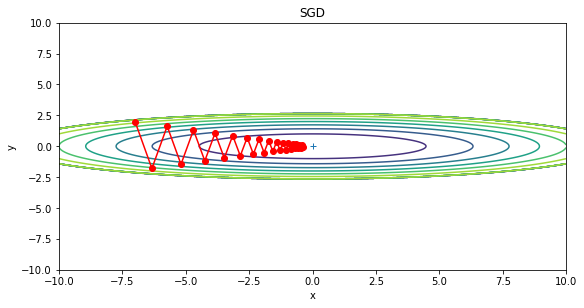

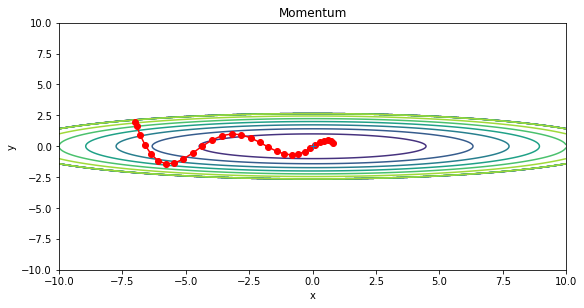

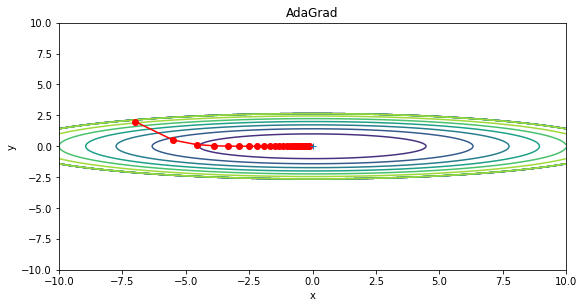

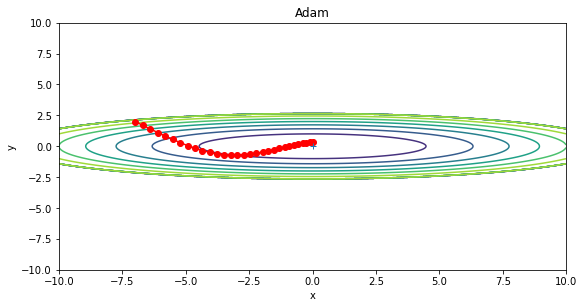

In [10]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.figure(figsize=(20,10))
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.3721234574083816
Momentum:2.4138626886191035
AdaGrad:2.0447509892012623
Adam:2.19906645276121
===========iteration:100===========
SGD:1.483065155722675
Momentum:0.5009276253019285
AdaGrad:0.2253982347827175
Adam:0.4805866911578323
===========iteration:200===========
SGD:0.8515776626475295
Momentum:0.2980480970073317
AdaGrad:0.11063644148106415
Adam:0.212430438547551
===========iteration:300===========
SGD:0.49186611658068286
Momentum:0.1845748562678102
AdaGrad:0.07708538502550497
Adam:0.13758731264162072
===========iteration:400===========
SGD:0.41522185634111747
Momentum:0.19065766876677426
AdaGrad:0.10739174867841006
Adam:0.1148034191634971
===========iteration:500===========
SGD:0.4517689576468761
Momentum:0.29718919231428814
AdaGrad:0.11532579268198583
Adam:0.2230873343391473
===========iteration:600===========
SGD:0.31593540259620967
Momentum:0.09277511738443166
AdaGrad:0.048823788781425716
Adam:0.06368405491514167
===========iteration:700==

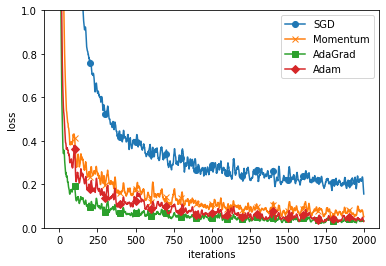

In [12]:
import os
import sys
sys.path.append(os.pardir)
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

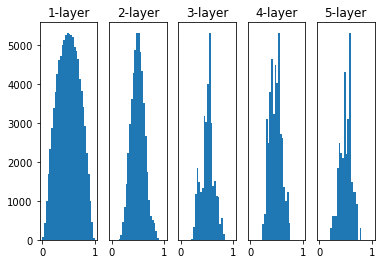

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이 곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
#     plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

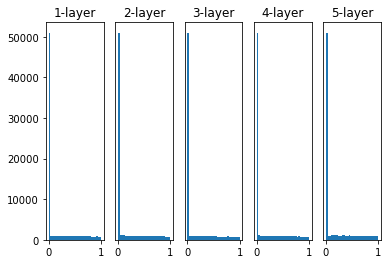

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이 곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


#     z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
#     plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [10]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

===========iteration:0===========
std=0.01:2.30251451920359
Xavier:2.313886890707135
He:2.3409490076045403
===========iteration:100===========
std=0.01:2.301742565094792
Xavier:2.243886559869506
He:1.4225938041279949
===========iteration:200===========
std=0.01:2.301198529726477
Xavier:2.1273229261212916
He:0.768171217602696
===========iteration:300===========
std=0.01:2.3000182992324474
Xavier:1.8492845408554959
He:0.573249562106841


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-0010c94fc7bd>", line 43, in <module>
    loss = networks[key].loss(x_batch, t_batch)
  File "..\common\multi_layer_net.py", line 87, in loss
    y = self.predict(x)
  File "..\common\multi_layer_net.py", line 71, in predict
    x = layer.forward(x)
  File "..\common\layers.py", line 57, in forward
    out = np.dot(self.x, self.W) + self.b
  File "<__array_function__ internals>", line 5, in dot
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2045, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the ab

TypeError: object of type 'NoneType' has no len()

============== 1/16 ==============
epoch:0 | 0.097 - 0.077
epoch:1 | 0.097 - 0.072


..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:2 | 0.097 - 0.086
epoch:3 | 0.097 - 0.11
epoch:4 | 0.097 - 0.131
epoch:5 | 0.097 - 0.14
epoch:6 | 0.097 - 0.153
epoch:7 | 0.097 - 0.166
epoch:8 | 0.097 - 0.182
epoch:9 | 0.097 - 0.195
epoch:10 | 0.097 - 0.225
epoch:11 | 0.097 - 0.245
epoch:12 | 0.097 - 0.268
epoch:13 | 0.097 - 0.285
epoch:14 | 0.097 - 0.287
epoch:15 | 0.097 - 0.299
epoch:16 | 0.097 - 0.318
epoch:17 | 0.097 - 0.341
epoch:18 | 0.097 - 0.367


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.372
============== 2/16 ==============
epoch:0 | 0.097 - 0.106
epoch:1 | 0.097 - 0.09


..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:2 | 0.097 - 0.112
epoch:3 | 0.097 - 0.143
epoch:4 | 0.097 - 0.165
epoch:5 | 0.097 - 0.187
epoch:6 | 0.097 - 0.211
epoch:7 | 0.097 - 0.231
epoch:8 | 0.097 - 0.258
epoch:9 | 0.097 - 0.288
epoch:10 | 0.097 - 0.309
epoch:11 | 0.097 - 0.331
epoch:12 | 0.097 - 0.348
epoch:13 | 0.097 - 0.375
epoch:14 | 0.097 - 0.389
epoch:15 | 0.097 - 0.403
epoch:16 | 0.097 - 0.423
epoch:17 | 0.097 - 0.443
epoch:18 | 0.097 - 0.461
epoch:19 | 0.097 - 0.464

No handles with labels found to put in legend.



============== 3/16 ==============
epoch:0 | 0.119 - 0.101
epoch:1 | 0.323 - 0.079
epoch:2 | 0.462 - 0.112
epoch:3 | 0.515 - 0.171
epoch:4 | 0.631 - 0.223
epoch:5 | 0.679 - 0.254
epoch:6 | 0.724 - 0.277
epoch:7 | 0.761 - 0.312
epoch:8 | 0.788 - 0.346
epoch:9 | 0.818 - 0.383
epoch:10 | 0.836 - 0.412
epoch:11 | 0.864 - 0.425
epoch:12 | 0.879 - 0.454
epoch:13 | 0.901 - 0.488
epoch:14 | 0.915 - 0.502
epoch:15 | 0.926 - 0.519
epoch:16 | 0.933 - 0.534
epoch:17 | 0.942 - 0.555
epoch:18 | 0.938 - 0.578


No handles with labels found to put in legend.


epoch:19 | 0.955 - 0.6
============== 4/16 ==============
epoch:0 | 0.122 - 0.112
epoch:1 | 0.167 - 0.103
epoch:2 | 0.337 - 0.134
epoch:3 | 0.449 - 0.208
epoch:4 | 0.545 - 0.268
epoch:5 | 0.583 - 0.352
epoch:6 | 0.627 - 0.425
epoch:7 | 0.648 - 0.475
epoch:8 | 0.682 - 0.532
epoch:9 | 0.699 - 0.574
epoch:10 | 0.716 - 0.598
epoch:11 | 0.738 - 0.632
epoch:12 | 0.747 - 0.656
epoch:13 | 0.759 - 0.677
epoch:14 | 0.767 - 0.704
epoch:15 | 0.793 - 0.718
epoch:16 | 0.791 - 0.741
epoch:17 | 0.805 - 0.75


No handles with labels found to put in legend.


epoch:18 | 0.823 - 0.768
epoch:19 | 0.831 - 0.786
============== 5/16 ==============
epoch:0 | 0.076 - 0.1
epoch:1 | 0.082 - 0.139
epoch:2 | 0.099 - 0.231
epoch:3 | 0.112 - 0.348
epoch:4 | 0.111 - 0.459
epoch:5 | 0.127 - 0.538
epoch:6 | 0.131 - 0.627
epoch:7 | 0.141 - 0.674
epoch:8 | 0.143 - 0.702
epoch:9 | 0.146 - 0.73
epoch:10 | 0.16 - 0.747
epoch:11 | 0.165 - 0.773
epoch:12 | 0.172 - 0.786
epoch:13 | 0.184 - 0.801
epoch:14 | 0.192 - 0.815
epoch:15 | 0.198 - 0.828
epoch:16 | 0.21 - 0.842
epoch:17 | 0.226 - 0.857
epoch:18 | 0.223 - 0.869

No handles with labels found to put in legend.



epoch:19 | 0.232 - 0.882
============== 6/16 ==============
epoch:0 | 0.094 - 0.13
epoch:1 | 0.136 - 0.225
epoch:2 | 0.107 - 0.417
epoch:3 | 0.115 - 0.618
epoch:4 | 0.116 - 0.702
epoch:5 | 0.116 - 0.762
epoch:6 | 0.127 - 0.793
epoch:7 | 0.119 - 0.817
epoch:8 | 0.119 - 0.836
epoch:9 | 0.116 - 0.854
epoch:10 | 0.116 - 0.863
epoch:11 | 0.116 - 0.875
epoch:12 | 0.116 - 0.894
epoch:13 | 0.116 - 0.9
epoch:14 | 0.116 - 0.905
epoch:15 | 0.116 - 0.919
epoch:16 | 0.116 - 0.925
epoch:17 | 0.116 - 0.932
epoch:18 | 0.116 - 0.936
epoch:19 | 0.116 - 0.942


No handles with labels found to put in legend.


============== 7/16 ==============
epoch:0 | 0.116 - 0.165
epoch:1 | 0.117 - 0.321
epoch:2 | 0.117 - 0.581
epoch:3 | 0.117 - 0.703
epoch:4 | 0.117 - 0.752
epoch:5 | 0.117 - 0.807
epoch:6 | 0.117 - 0.847
epoch:7 | 0.117 - 0.874
epoch:8 | 0.117 - 0.9
epoch:9 | 0.117 - 0.915
epoch:10 | 0.117 - 0.924
epoch:11 | 0.117 - 0.937
epoch:12 | 0.117 - 0.946
epoch:13 | 0.117 - 0.957
epoch:14 | 0.117 - 0.964
epoch:15 | 0.117 - 0.964
epoch:16 | 0.117 - 0.972
epoch:17 | 0.117 - 0.981
epoch:18 | 0.117 - 0.983
epoch:19 | 0.117 - 0.99

No handles with labels found to put in legend.



============== 8/16 ==============
epoch:0 | 0.099 - 0.079
epoch:1 | 0.117 - 0.427
epoch:2 | 0.117 - 0.638
epoch:3 | 0.117 - 0.739
epoch:4 | 0.117 - 0.837
epoch:5 | 0.117 - 0.878
epoch:6 | 0.117 - 0.919
epoch:7 | 0.116 - 0.943
epoch:8 | 0.116 - 0.955
epoch:9 | 0.116 - 0.967
epoch:10 | 0.116 - 0.976
epoch:11 | 0.116 - 0.983
epoch:12 | 0.116 - 0.986
epoch:13 | 0.116 - 0.993
epoch:14 | 0.116 - 0.998
epoch:15 | 0.116 - 0.999
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 0.999


No handles with labels found to put in legend.


epoch:18 | 0.116 - 1.0
epoch:19 | 0.117 - 1.0
============== 9/16 ==============
epoch:0 | 0.105 - 0.137
epoch:1 | 0.105 - 0.541
epoch:2 | 0.117 - 0.731
epoch:3 | 0.117 - 0.835
epoch:4 | 0.116 - 0.855
epoch:5 | 0.117 - 0.887
epoch:6 | 0.117 - 0.923
epoch:7 | 0.117 - 0.957
epoch:8 | 0.117 - 0.985
epoch:9 | 0.117 - 0.994
epoch:10 | 0.117 - 0.995
epoch:11 | 0.117 - 0.997
epoch:12 | 0.117 - 0.995
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.094 - 0.159
epoch:1 | 0.117 - 0.63
epoch:2 | 0.117 - 0.715
epoch:3 | 0.116 - 0.769
epoch:4 | 0.116 - 0.778
epoch:5 | 0.116 - 0.83
epoch:6 | 0.116 - 0.869
epoch:7 | 0.116 - 0.901
epoch:8 | 0.116 - 0.962
epoch:9 | 0.117 - 0.98
epoch:10 | 0.116 - 0.984
epoch:11 | 0.116 - 0.986
epoch:12 | 0.116 - 0.976
epoch:13 | 0.117 - 0.988
epoch:14 | 0.116 - 0.992
epoch:15 | 0.116 - 0.993
epoch:16 | 0.116 - 0.994
epoch:17 | 0.117 - 0.988
epoch:18 | 0.116 - 0.995


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.995
============== 11/16 ==============
epoch:0 | 0.116 - 0.134
epoch:1 | 0.099 - 0.701
epoch:2 | 0.116 - 0.694
epoch:3 | 0.116 - 0.803
epoch:4 | 0.116 - 0.816
epoch:5 | 0.116 - 0.844
epoch:6 | 0.116 - 0.876
epoch:7 | 0.116 - 0.855
epoch:8 | 0.116 - 0.888
epoch:9 | 0.116 - 0.856
epoch:10 | 0.116 - 0.962
epoch:11 | 0.116 - 0.976
epoch:12 | 0.116 - 0.98
epoch:13 | 0.116 - 0.989
epoch:14 | 0.116 - 0.989
epoch:15 | 0.116 - 0.988
epoch:16 | 0.116 - 0.991
epoch:17 | 0.116 - 0.917


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.989
epoch:19 | 0.116 - 0.888
============== 12/16 ==============
epoch:0 | 0.117 - 0.18
epoch:1 | 0.117 - 0.538
epoch:2 | 0.117 - 0.558
epoch:3 | 0.117 - 0.416
epoch:4 | 0.117 - 0.644
epoch:5 | 0.117 - 0.686
epoch:6 | 0.117 - 0.711
epoch:7 | 0.117 - 0.71
epoch:8 | 0.116 - 0.698
epoch:9 | 0.116 - 0.72
epoch:10 | 0.116 - 0.789
epoch:11 | 0.116 - 0.801
epoch:12 | 0.116 - 0.796
epoch:13 | 0.116 - 0.804
epoch:14 | 0.116 - 0.805
epoch:15 | 0.116 - 0.798
epoch:16 | 0.116 - 0.797
epoch:17 | 0.116 - 0.8
epoch:18 | 0.116 - 0.804
epoch:19 | 0.117 - 0.803

No handles with labels found to put in legend.



============== 13/16 ==============
epoch:0 | 0.116 - 0.184
epoch:1 | 0.117 - 0.549
epoch:2 | 0.117 - 0.578
epoch:3 | 0.117 - 0.661
epoch:4 | 0.117 - 0.741
epoch:5 | 0.116 - 0.763
epoch:6 | 0.117 - 0.782
epoch:7 | 0.117 - 0.791
epoch:8 | 0.117 - 0.794
epoch:9 | 0.117 - 0.774
epoch:10 | 0.117 - 0.795
epoch:11 | 0.117 - 0.798
epoch:12 | 0.117 - 0.799
epoch:13 | 0.117 - 0.803
epoch:14 | 0.117 - 0.834
epoch:15 | 0.117 - 0.892
epoch:16 | 0.117 - 0.89
epoch:17 | 0.117 - 0.888


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.88
epoch:19 | 0.117 - 0.889
============== 14/16 ==============
epoch:0 | 0.117 - 0.217
epoch:1 | 0.117 - 0.406
epoch:2 | 0.117 - 0.455
epoch:3 | 0.117 - 0.511
epoch:4 | 0.117 - 0.513
epoch:5 | 0.117 - 0.509
epoch:6 | 0.117 - 0.495
epoch:7 | 0.117 - 0.436
epoch:8 | 0.117 - 0.529
epoch:9 | 0.117 - 0.562
epoch:10 | 0.117 - 0.596
epoch:11 | 0.117 - 0.594
epoch:12 | 0.117 - 0.602
epoch:13 | 0.117 - 0.612
epoch:14 | 0.117 - 0.605
epoch:15 | 0.117 - 0.614
epoch:16 | 0.117 - 0.612
epoch:17 | 0.117 - 0.612
epoch:18 | 0.117 - 0.595

No handles with labels found to put in legend.



epoch:19 | 0.117 - 0.616
============== 15/16 ==============
epoch:0 | 0.105 - 0.124
epoch:1 | 0.116 - 0.363
epoch:2 | 0.116 - 0.392
epoch:3 | 0.116 - 0.497
epoch:4 | 0.116 - 0.507
epoch:5 | 0.116 - 0.514
epoch:6 | 0.116 - 0.513
epoch:7 | 0.116 - 0.515
epoch:8 | 0.116 - 0.514
epoch:9 | 0.116 - 0.513
epoch:10 | 0.116 - 0.511
epoch:11 | 0.116 - 0.515
epoch:12 | 0.116 - 0.52
epoch:13 | 0.116 - 0.521
epoch:14 | 0.116 - 0.521
epoch:15 | 0.116 - 0.39
epoch:16 | 0.116 - 0.503
epoch:17 | 0.116 - 0.511
epoch:18 | 0.116 - 0.52


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.522
============== 16/16 ==============
epoch:0 | 0.116 - 0.167
epoch:1 | 0.117 - 0.233
epoch:2 | 0.117 - 0.375
epoch:3 | 0.117 - 0.367
epoch:4 | 0.117 - 0.421
epoch:5 | 0.117 - 0.407
epoch:6 | 0.117 - 0.376
epoch:7 | 0.117 - 0.41
epoch:8 | 0.117 - 0.438
epoch:9 | 0.117 - 0.385
epoch:10 | 0.117 - 0.42
epoch:11 | 0.117 - 0.498
epoch:12 | 0.117 - 0.487
epoch:13 | 0.117 - 0.502
epoch:14 | 0.117 - 0.5
epoch:15 | 0.117 - 0.48
epoch:16 | 0.117 - 0.5
epoch:17 | 0.117 - 0.501
epoch:18 | 0.117 - 0.498
epoch:19 | 0.117 - 0.483


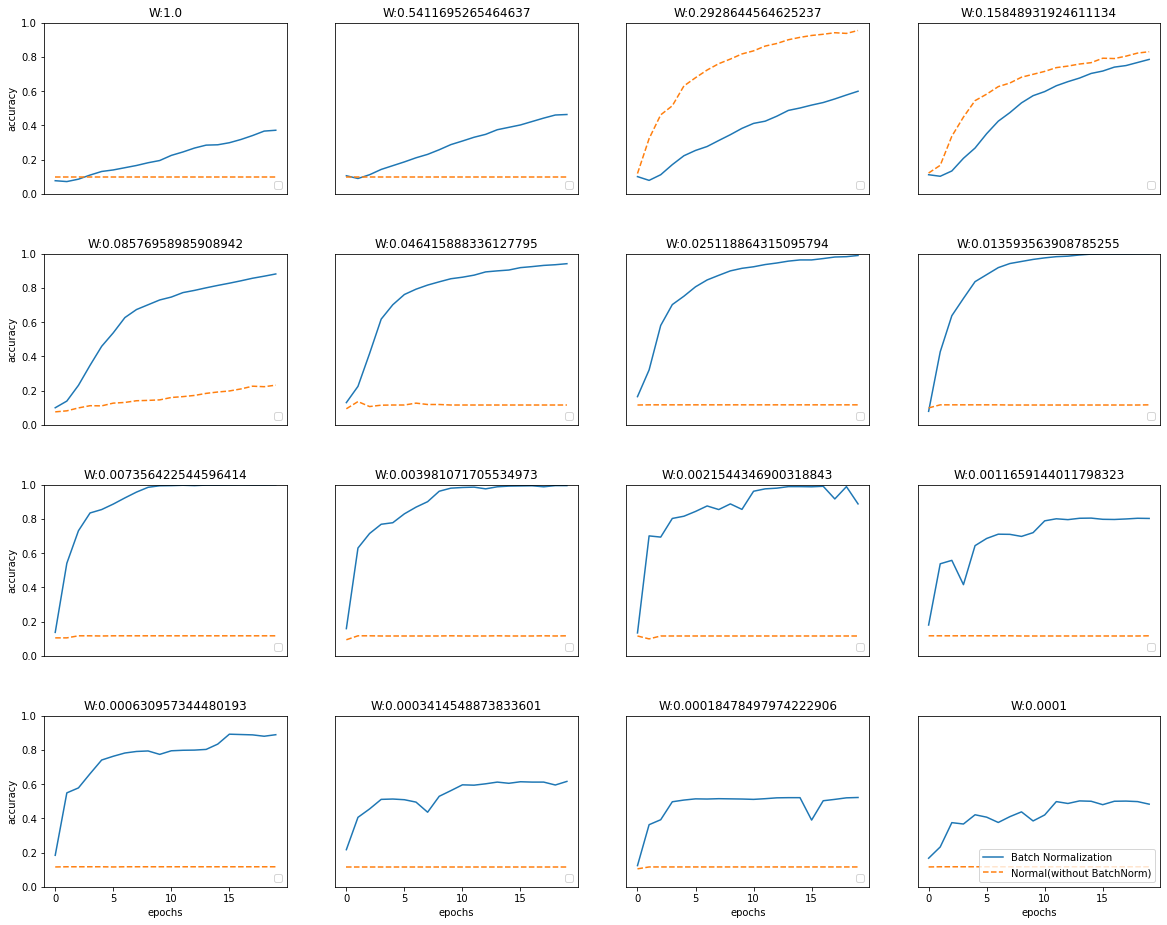

In [5]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

plt.figure(figsize=(20,15))
for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.09666666666666666, test acc:0.0958
epoch:1, train acc:0.11666666666666667, test acc:0.1038
epoch:2, train acc:0.14333333333333334, test acc:0.1122
epoch:3, train acc:0.18, test acc:0.1229
epoch:4, train acc:0.19333333333333333, test acc:0.1335
epoch:5, train acc:0.21666666666666667, test acc:0.1476
epoch:6, train acc:0.23333333333333334, test acc:0.1681
epoch:7, train acc:0.2966666666666667, test acc:0.2161
epoch:8, train acc:0.37, test acc:0.2609
epoch:9, train acc:0.43, test acc:0.2877
epoch:10, train acc:0.44, test acc:0.3073
epoch:11, train acc:0.4633333333333333, test acc:0.3195
epoch:12, train acc:0.4533333333333333, test acc:0.3302
epoch:13, train acc:0.47, test acc:0.3372
epoch:14, train acc:0.4866666666666667, test acc:0.3504
epoch:15, train acc:0.49, test acc:0.3658
epoch:16, train acc:0.51, test acc:0.3692
epoch:17, train acc:0.5266666666666666, test acc:0.3729
epoch:18, train acc:0.5466666666666666, test acc:0.3902
epoch:19, train acc:0.5633333333333334

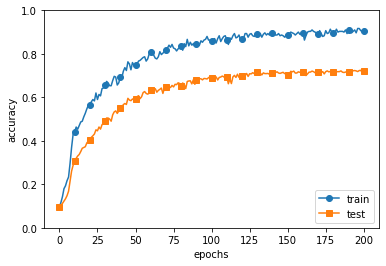

In [6]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
# weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

train loss:2.2859801693101103
=== epoch:1, train acc:0.14666666666666667, test acc:0.1187 ===
train loss:2.3038483943530124
train loss:2.3112737929216483
train loss:2.2883343811094665
=== epoch:2, train acc:0.16, test acc:0.1199 ===
train loss:2.286060771714993
train loss:2.305681248408918
train loss:2.291848674420358
=== epoch:3, train acc:0.15666666666666668, test acc:0.1254 ===
train loss:2.2818242737863663
train loss:2.2973103069196577
train loss:2.3027013249133352
=== epoch:4, train acc:0.17, test acc:0.1295 ===
train loss:2.2967344832140255
train loss:2.3051286915256495
train loss:2.2991729792672406
=== epoch:5, train acc:0.16333333333333333, test acc:0.133 ===
train loss:2.305712074830784
train loss:2.2943676178306953
train loss:2.2919097071525627
=== epoch:6, train acc:0.16666666666666666, test acc:0.138 ===
train loss:2.298561570891584
train loss:2.2969425343091734
train loss:2.3168020538332494
=== epoch:7, train acc:0.17333333333333334, test acc:0.14 ===
train loss:2.29766446

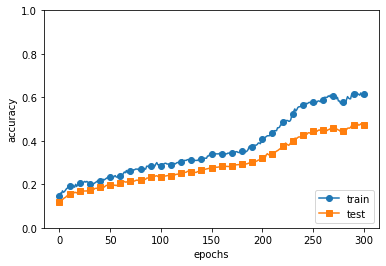

In [7]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

val acc:0.55 | lr:0.0025097789135641786, weight decay:7.565156012586877e-08
val acc:0.1 | lr:0.0005223806739838797, weight decay:1.6154516128096867e-05
val acc:0.14 | lr:4.371585679690882e-06, weight decay:3.673850013078401e-07
val acc:0.13 | lr:2.0647062346484167e-05, weight decay:1.59900704923607e-05
val acc:0.16 | lr:4.6431561728166426e-05, weight decay:5.717651092630314e-06
val acc:0.77 | lr:0.008569419684275744, weight decay:6.526490704959127e-08
val acc:0.12 | lr:9.184126658909912e-05, weight decay:3.083239299026667e-06
val acc:0.1 | lr:0.0003331074548869596, weight decay:5.412551341335473e-07
val acc:0.11 | lr:1.0113447074983038e-05, weight decay:7.205049809648477e-07
val acc:0.09 | lr:5.789958111554211e-05, weight decay:7.123330665033116e-05
val acc:0.14 | lr:0.0007657575754027871, weight decay:7.945687507340151e-08
val acc:0.09 | lr:0.0002677854175856546, weight decay:1.6453498346476976e-05
val acc:0.2 | lr:0.000857476192714858, weight decay:2.235544994978318e-06
val acc:0.71 

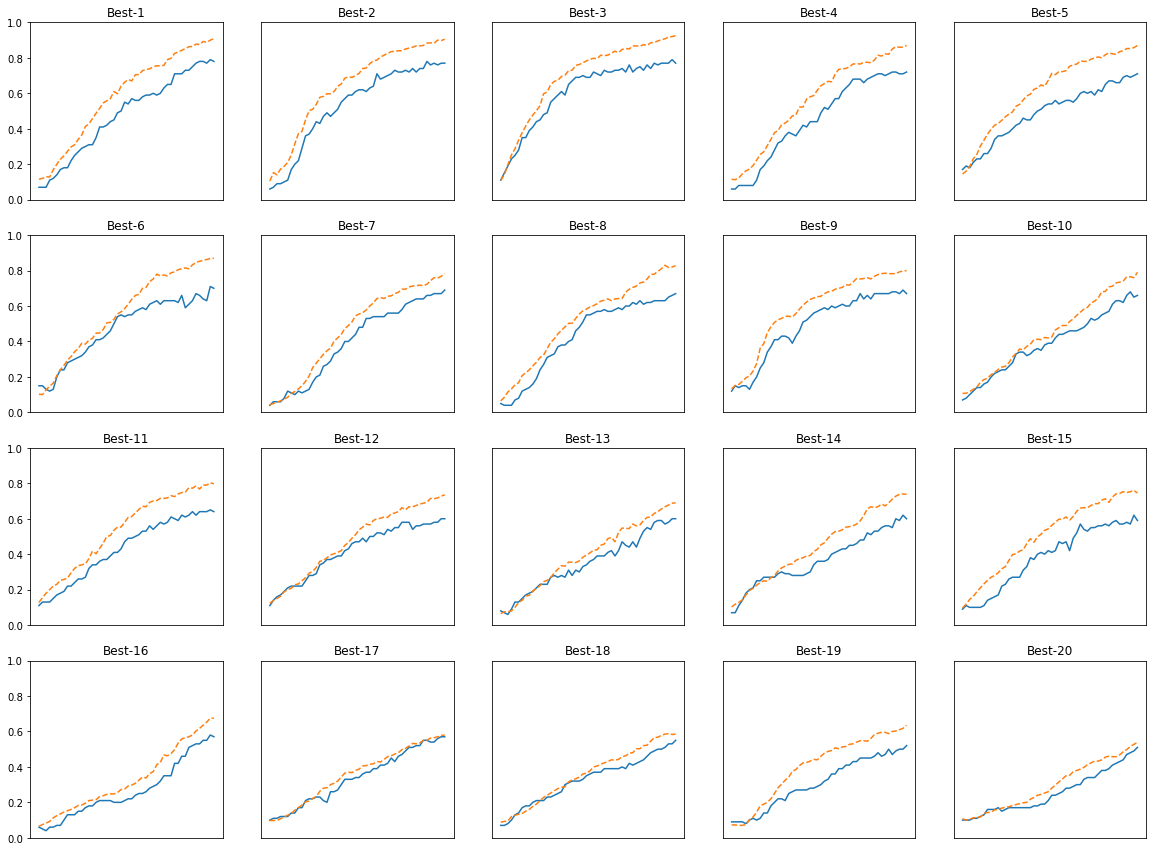

In [8]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0
plt.figure(figsize=(20,15))
for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()